<h1 style="color:black;text-align:center;font-size:300%;font-family:verdana;">
Linear Regression
</h1>


In [64]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  

import warnings
warnings.simplefilter(action='ignore')

In [65]:
df = pd.read_csv('clean_data.csv')
df.head()

,Origin,Destination,TTT,LOS,Arrival Time,Return Arrival Time,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,...,Departure Time Category Num,Return Time Category Num,Is Weekend Flight,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections,Total Flight Duration(min),Flight Duration Binned
0,London,Paris,1,1,3/7/2025 16:30,3/8/2025 19:25,SEN,CDG,ORY,LGW,...,2,3,True,64,25,13,45,0,135,0-200
1,London,Paris,1,1,3/7/2025 16:30,3/8/2025 14:25,SEN,CDG,ORY,LHR,...,2,2,True,64,25,13,23,0,145,0-200
2,London,Paris,1,1,3/7/2025 16:30,3/8/2025 14:50,SEN,CDG,CDG,LGW,...,2,2,True,64,25,25,45,0,135,0-200
3,London,Paris,1,1,3/7/2025 16:30,3/8/2025 12:00,SEN,CDG,ORY,LGW,...,2,1,True,64,25,13,45,0,140,0-200
4,London,Paris,1,1,3/7/2025 16:30,3/8/2025 15:20,SEN,CDG,ORY,LGW,...,2,2,True,64,25,13,45,0,140,0-200


In [66]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527232 entries, 0 to 527231
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Origin                             527232 non-null  object
 1   Destination                        527232 non-null  object
 2   TTT                                527232 non-null  int64 
 3   LOS                                527232 non-null  int64 
 4   Arrival Time                       527232 non-null  object
 5   Return Arrival Time                527232 non-null  object
 6   Onward Departure Airport           527232 non-null  object
 7   Onward Arrival Airport             527232 non-null  object
 8   Return Departure Airport           527232 non-null  object
 9   Return Arrival Airport             527232 non-null  object
 10  Onward Airlines                    527232 non-null  object
 11  Return Airlines                    527232 non-null  

,TTT,LOS,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Total Onward Flight Duration(min),...,Return Day,Return Weekday,Departure Time Category Num,Return Time Category Num,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections,Total Flight Duration(min)
count,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.00000,527232.000000,527232.000000,527232.000000,527232.000000,...,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000
mean,15.527781,2.993612,0.005127,0.921192,0.005280,1.04271,0.112493,0.006261,594.694789,121.181558,...,16.213113,3.013518,1.795703,1.806787,33.516820,33.219298,33.621668,33.153344,0.010407,242.606168
std,8.583505,1.411998,0.072079,21.772410,0.073488,24.15458,0.315973,0.081154,207.361836,44.046941,...,9.099821,1.994234,0.793875,0.803933,16.810686,16.348130,16.894544,16.528630,0.106142,81.497798
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,168.000000,60.000000,...,1.000000,0.000000,0.000000,0.000000,11.000000,11.000000,11.000000,11.000000,0.000000,130.000000
25%,8.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,435.000000,80.000000,...,8.000000,1.000000,1.000000,1.000000,23.000000,23.000000,23.000000,23.000000,0.000000,155.000000
50%,16.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,585.000000,130.000000,...,17.000000,3.000000,2.000000,2.000000,32.000000,32.000000,32.000000,32.000000,0.000000,255.000000
75%,23.000000,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,728.000000,150.000000,...,24.000000,5.000000,2.000000,2.000000,45.000000,45.000000,45.000000,45.000000,0.000000,310.000000
max,30.000000,5.000000,2.000000,1560.000000,2.000000,1785.00000,1.000000,2.000000,1342.000000,2380.000000,...,31.000000,6.000000,3.000000,3.000000,85.000000,85.000000,85.000000,85.000000,3.000000,3635.000000


## Initial Feature Selection  

Before conducting an in-depth analysis, we initially selected features that we **believed** would impact flight prices based on business intuition.  

### **Selected Features:**  
- **Carry-ons** – Number of carry-on bags.  
- **Departure Day & Month** – Possible seasonal price effects.  
- **Onward & Return Airport Distances** – Distance-related cost factors.  
- **Return Day** – Potential impact on demand.  
- **TTT** – A feature we assumed might influence pricing.  

### **Why These Features?**  
This selection was based on logical assumptions about factors affecting flight prices. The goal was to test the model's initial behavior before refining the feature set through correlation analysis and statistical validation.  


In [67]:
features = [
    "Carry-ons", 
    "Departure Day", 
    "Departure Month", 
    "Onward Departure Airport Distance", 
    "Return Day",
    "Onward Arrival Airport Distance", 
    "Return Arrival Airport Distance", 
    "TTT" 
]

target = "Price(NIS)"

## Initial Linear Regression Model  

We trained a **Linear Regression** model to predict flight prices using our initial feature set. Since linear regression is sensitive to different feature scales, we applied **StandardScaler** to normalize the data.  

The dataset was split into **70% training** and **30% testing**, and the model was trained and evaluated using key metrics:  
- **MSE & RMSE:** Measure prediction errors.  
- **MAE:** Average absolute error.  
- **R² Score:** Indicates how well the model explains price variability.  

In [68]:
from sklearn.preprocessing import StandardScaler
import math

X = df[features]
y = df[target]

# since Linear Regression is a distance-based model, it is important to scale our data so different features have similar weights
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

# Model performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Initial Mean Squared Error: {mse:.2f}")
print(f"Initial Root Mean Squared Error: {rmse:.2f}")
print(f"Initial Mean Absolute Error: {mae:.2f}")
print(f"Initial R2 Score: {r2:.2f}")


Initial Mean Squared Error: 38955.41
Initial Root Mean Squared Error: 197.37
Initial Mean Absolute Error: 157.88
Initial R2 Score: 0.09


### **VERY** poor scoring.
#### Visualizing our predictions vs the actual price to have an idea how wrong the predictions are:

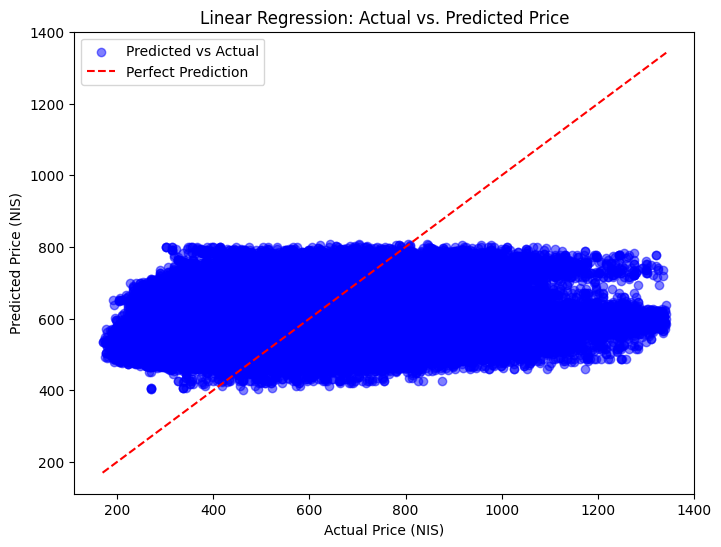

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Prediction")
plt.xlabel("Actual Price (NIS)")
plt.ylabel("Predicted Price (NIS)")
plt.title("Linear Regression: Actual vs. Predicted Price")
plt.legend()
plt.show()

The initial **Linear Regression model** performed poorly, as indicated by:  
- **MSE:** 38,955.41 (high error variance)  
- **RMSE:** 197.37 (large deviation in predictions)  
- **MAE:** 157.88 (average absolute prediction error)  
- **R² Score:** **0.09** (very low explanatory power)  

### **Key Takeaways:**  
- The model struggles to capture the complexity of flight pricing.  
- Predictions are widely scattered and far from the ideal **y = x** line (perfect predictions).  
- The **low R²** suggests that the selected features are not strong predictors of price.
_________________  

### **Next Step:**  
To improve the model, we will **select only the features with the highest correlation** to the target variable and retrain the model to assess if we can achieve better accuracy.  

In [70]:
# Select only numeric and boolean columns
num_bool_features = df.select_dtypes(include=['number', 'bool'])

# Compute correlation with 'Price(NIS)'
price_corr = num_bool_features.corr()["Price(NIS)"].dropna()

# Create a DataFrame, sort by absolute correlation value, and display top features
corr_table = pd.DataFrame({"Feature": price_corr.index, "Correlation": price_corr.values})
corr_table["Abs_Correlation"] = corr_table["Correlation"].abs()
corr_table = corr_table.sort_values(by="Abs_Correlation", ascending=False).drop(columns=["Abs_Correlation"])

# Print the sorted correlation table
print(corr_table.head(10))


                              Feature  Correlation
8                          Price(NIS)     1.000000
25         Total Flight Duration(min)     0.439293
9   Total Onward Flight Duration(min)     0.409827
10  Total Return Flight Duration(min)     0.386589
6                           Carry-ons     0.198557
12                      Departure Day    -0.168935
11                    Departure Month     0.081097
20  Onward Departure Airport Distance    -0.076258
15                         Return Day    -0.074558
21    Onward Arrival Airport Distance    -0.070608


In [71]:
# Updated feature list
features_updated = [
    "Total Flight Duration(min)",
    "Total Onward Flight Duration(min)",
    "Total Return Flight Duration(min)",
    "Carry-ons", 
    "Departure Day"
]

y = df["Price(NIS)"]

scaler = StandardScaler()
X_scaled_updated = scaler.fit_transform(df[features_updated])

X_train, X_test, y_train, y_test = train_test_split(X_scaled_updated, y, test_size=0.3, random_state=101)

lin_reg_updated = LinearRegression()
lin_reg_updated.fit(X_train, y_train)

y_pred_updated = lin_reg_updated.predict(X_test)

mse_updated = mean_squared_error(y_test, y_pred_updated)
rmse_updated = math.sqrt(mse_updated)
mae_updated = mean_absolute_error(y_test, y_pred_updated)
r2_updated = r2_score(y_test, y_pred_updated)

print(f"Mean Squared Error (Updated): {mse_updated:.2f}")
print(f"Root Mean Squared Error (Updated): {rmse_updated:.2f}")
print(f"Mean Absolute Error (Updated): {mae_updated:.2f}")
print(f"R2 Score (Updated): {r2_updated:.2f}")

Mean Squared Error (Updated): 32057.75
Root Mean Squared Error (Updated): 179.05
Mean Absolute Error (Updated): 139.48
R2 Score (Updated): 0.25


## Feature Selection & Model Improvement  

We refined our feature selection by choosing only the **most correlated variables** with flight price. The updated model, trained with these features, showed some improvement:  

- **MSE:** 32,058.15 (lower than before)  
- **RMSE:** 179.05 (slight reduction in error)  
- **MAE:** 139.49 (better absolute error)  
- **R² Score:** **0.25** (improved but still weak)  

### **Key Takeaways:**  
- The model now captures more variance in flight prices, but performance remains poor.  
- Linear regression still struggles to explain complex pricing patterns.  
_________________
### **Next Step:**  
We will **introduce dummy variables** for categorical features to check if they improve model accuracy.  


In [72]:
data_encoded = pd.get_dummies(df, columns=["Onward Airlines", "Return Airlines"], drop_first=True)

features_final = [
    "Carry-ons", "Departure Day", "Departure Month", 
    "Onward Departure Airport Distance", "Return Day", 
    "Onward Arrival Airport Distance", "Return Arrival Airport Distance", "TTT"
] + list(data_encoded.columns.difference(df.columns))  # Add only the new dummy variables

# Standardizing only the numerical features
scaler = StandardScaler()
data_encoded[["Carry-ons", "Departure Day", "Departure Month", 
              "Onward Departure Airport Distance", "Return Day", 
              "Onward Arrival Airport Distance", "Return Arrival Airport Distance", "TTT"]] = \
    scaler.fit_transform(data_encoded[["Carry-ons", "Departure Day", "Departure Month", 
                                       "Onward Departure Airport Distance", "Return Day", 
                                       "Onward Arrival Airport Distance", "Return Arrival Airport Distance", "TTT"]])

# Define X (features) and y (target) without running the algorithm yet
X_prepared = data_encoded[features_final]
y_prepared = data_encoded["Price(NIS)"]

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y_prepared, test_size=0.3, random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (Updated): {mse:.2f}")
print(f"Root Mean Squared Error (Updated): {rmse:.2f}")
print(f"Mean Absolute Error (Updated): {mae:.2f}")
print(f"R2 Score (Updated): {r2:.2f}")

Mean Squared Error (Updated): 30895.17
Root Mean Squared Error (Updated): 175.77
Mean Absolute Error (Updated): 139.71
R2 Score (Updated): 0.28


## Adding Dummy Variables & Model Improvement  

After incorporating **dummy variables for categorical features**, we observed further improvement in model performance:  

- **MSE:** 30,895.17 (further reduction)  
- **RMSE:** 175.77 (lower prediction error)  
- **MAE:** 139.71 (relatively stable)  
- **R² Score:** **0.28** (slight improvement)  

### **Key Takeaways:**  
- The model continues to improve, but the performance is still **not meaningful** for accurate predictions.  
- Dummy variables helped capture some additional variance, but the fundamental limitations of linear regression persist.  
___________


### **Next Step:**  
We will **remove highly correlated features** to avoid redundancy, starting with **Total Flight Duration(min)** to prevent multicollinearity.  

Then, we will **select features based on their correlation with Price(NIS)** and rank them by importance. We will **incrementally add features**, training multiple models to evaluate their impact on **R², MSE, RMSE, and MAE**, ensuring we use the most relevant predictors.  


In [73]:
# Select only numeric and boolean columns
num_bool_features = df.select_dtypes(include=['number', 'bool'])

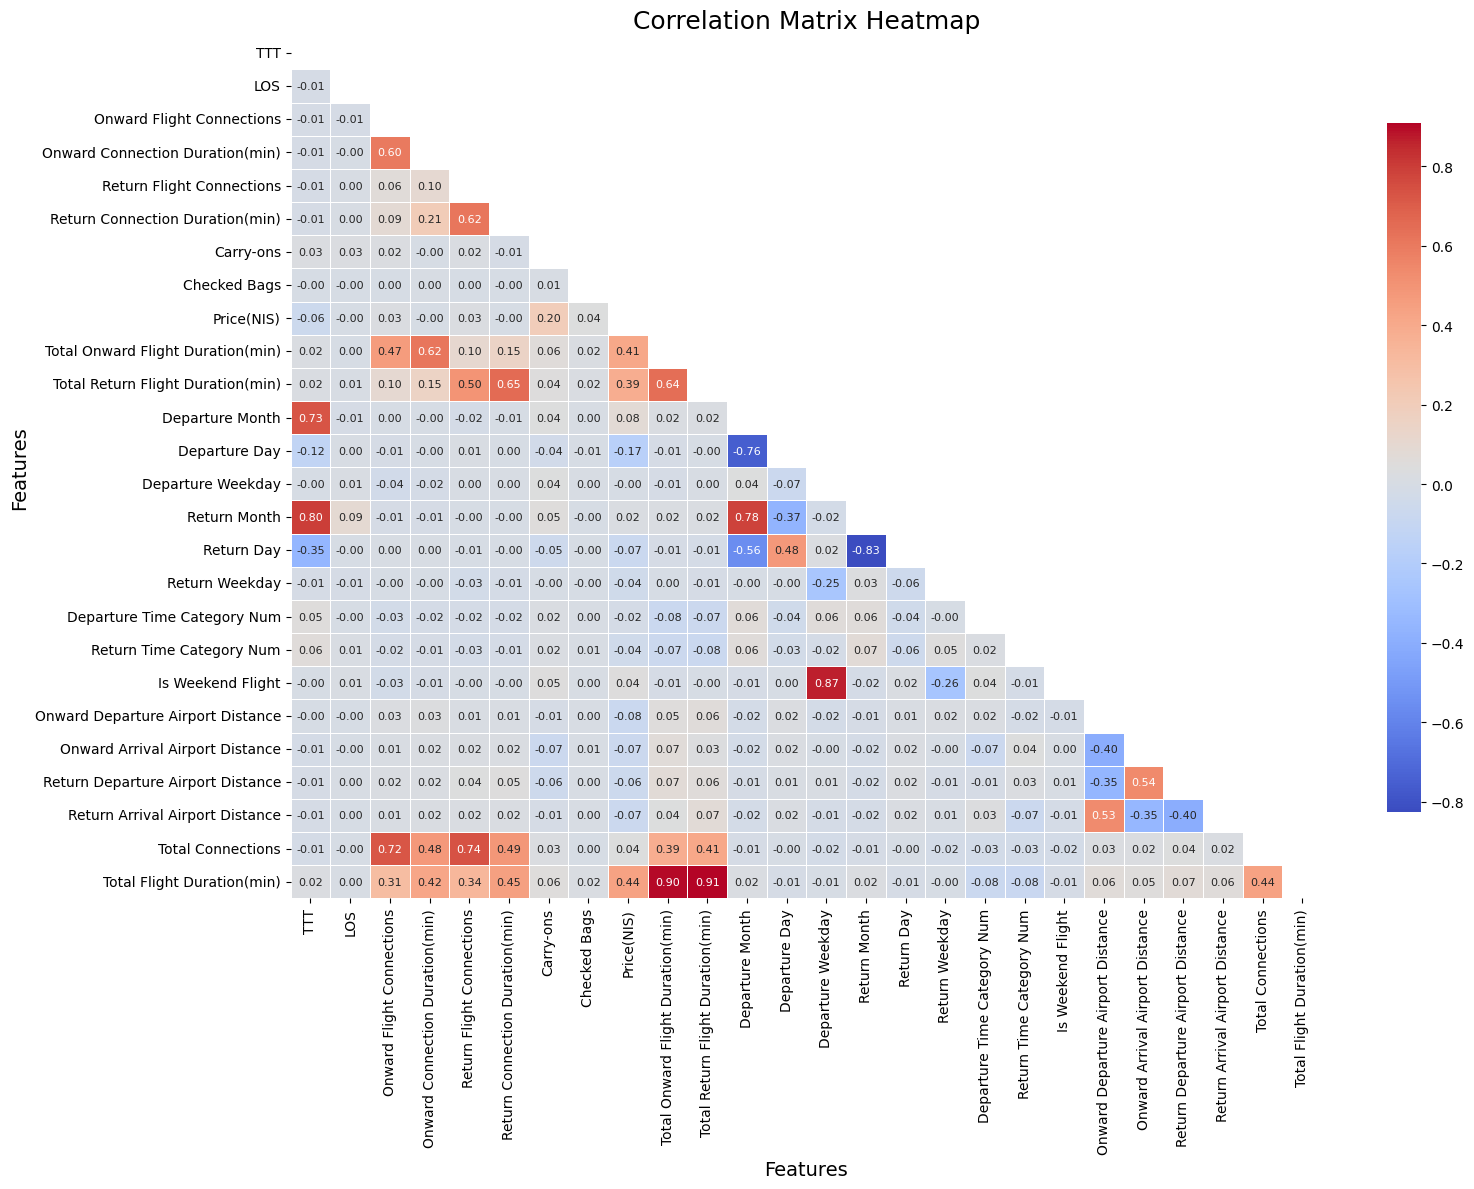

In [74]:
correlation_matrix = num_bool_features.corr()

plt.figure(figsize=(16, 12))

# Mask the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with annotations, smaller font size, and custom color palette
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask, 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 8})

# Title and labels
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [75]:
# removing features that are highly correlated to other features
columns_to_remove = ["Total Flight Duration(min)"]
df = df.drop(columns=columns_to_remove)

In [76]:
# Select only numeric and boolean columns
num_bool_features = df.select_dtypes(include=['number', 'bool'])

price_corr = num_bool_features.corr()["Price(NIS)"].dropna()
corr_table = price_corr.abs().sort_values(ascending=False)

corr_table = corr_table.drop("Price(NIS)")

X = df.drop(columns=['Price(NIS)'])
y = df['Price(NIS)']

X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

results = []
selected_features = []

for feature in corr_table.index:
    selected_features.append(feature)
    
    # Select subset of features
    X_train = X_train_full[selected_features]
    X_test = X_test_full[selected_features]
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results.append([len(selected_features), feature, r2, mae, mse, rmse])

results_df = pd.DataFrame(results, columns=["Num_Features", "Added_Feature", "R²", "MAE", "MSE", "RMSE"])
print(results_df)

    Num_Features                      Added_Feature        R²         MAE  \
0              1  Total Onward Flight Duration(min)  0.175010  147.636094   
1              2  Total Return Flight Duration(min)  0.197384  145.418526   
2              3                          Carry-ons  0.225909  142.248405   
3              4                      Departure Day  0.251946  139.151439   
4              5                    Departure Month  0.259110  138.631078   
5              6  Onward Departure Airport Distance  0.268891  137.040996   
6              7                         Return Day  0.268925  137.085908   
7              8    Onward Arrival Airport Distance  0.286668  133.841326   
8              9    Return Arrival Airport Distance  0.291538  132.950640   
9             10                                TTT  0.297140  132.443174   
10            11  Return Departure Airport Distance  0.305634  131.261501   
11            12                  Is Weekend Flight  0.307416  131.104107   

#### Using all 24 features yielded the best possible results for Linear Regression. 📊  
##### However, the relationship between our data and flight prices appears to be **mostly non-linear**, which explains the consistently low scores. 🚀  
___

 Residual Plot: Checking if there are any patterns in the errors, to confirm model issues, such as non-linearity.

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_updated = model.predict(X_test)

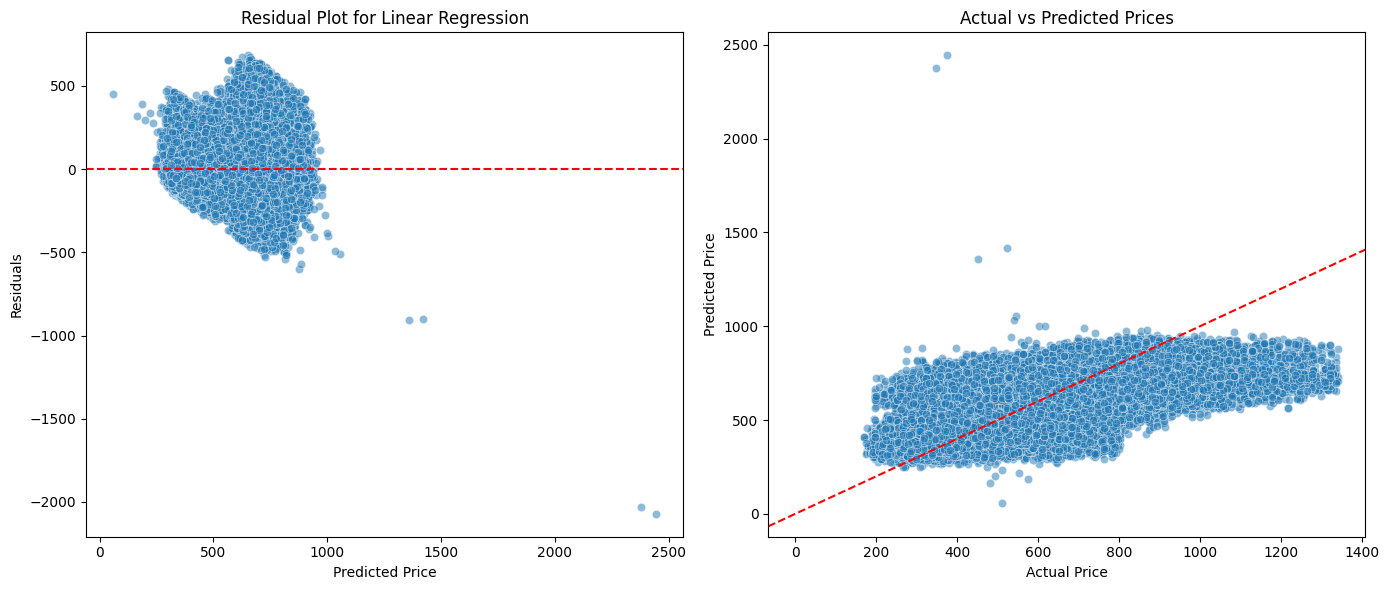

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

residuals = y_test - y_pred_updated
sns.scatterplot(x=y_pred_updated, y=residuals, alpha=0.5, ax=axes[0])
axes[0].axhline(0, color="red", linestyle="--")  # קו אפס
axes[0].set_xlabel("Predicted Price")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot for Linear Regression")

sns.scatterplot(x=y_test, y=y_pred_updated, alpha=0.5, ax=axes[1])
axes[1].axline([0, 0], slope=1, color="red", linestyle="--")  # קו y=x
axes[1].set_xlabel("Actual Price")
axes[1].set_ylabel("Predicted Price")
axes[1].set_title("Actual vs Predicted Prices")

plt.tight_layout()
plt.show()

### **Conclusion**  
The residual plot and actual vs. predicted prices confirm that **Linear Regression struggles to capture the complexity of flight prices**, reinforcing the need for a more advanced, non-linear model. 🚀  
_______________

### **Next Step:**  
We will now analyze **feature importance** in the Linear Regression model by examining their coefficients to understand which variables have the strongest impact on flight prices. 

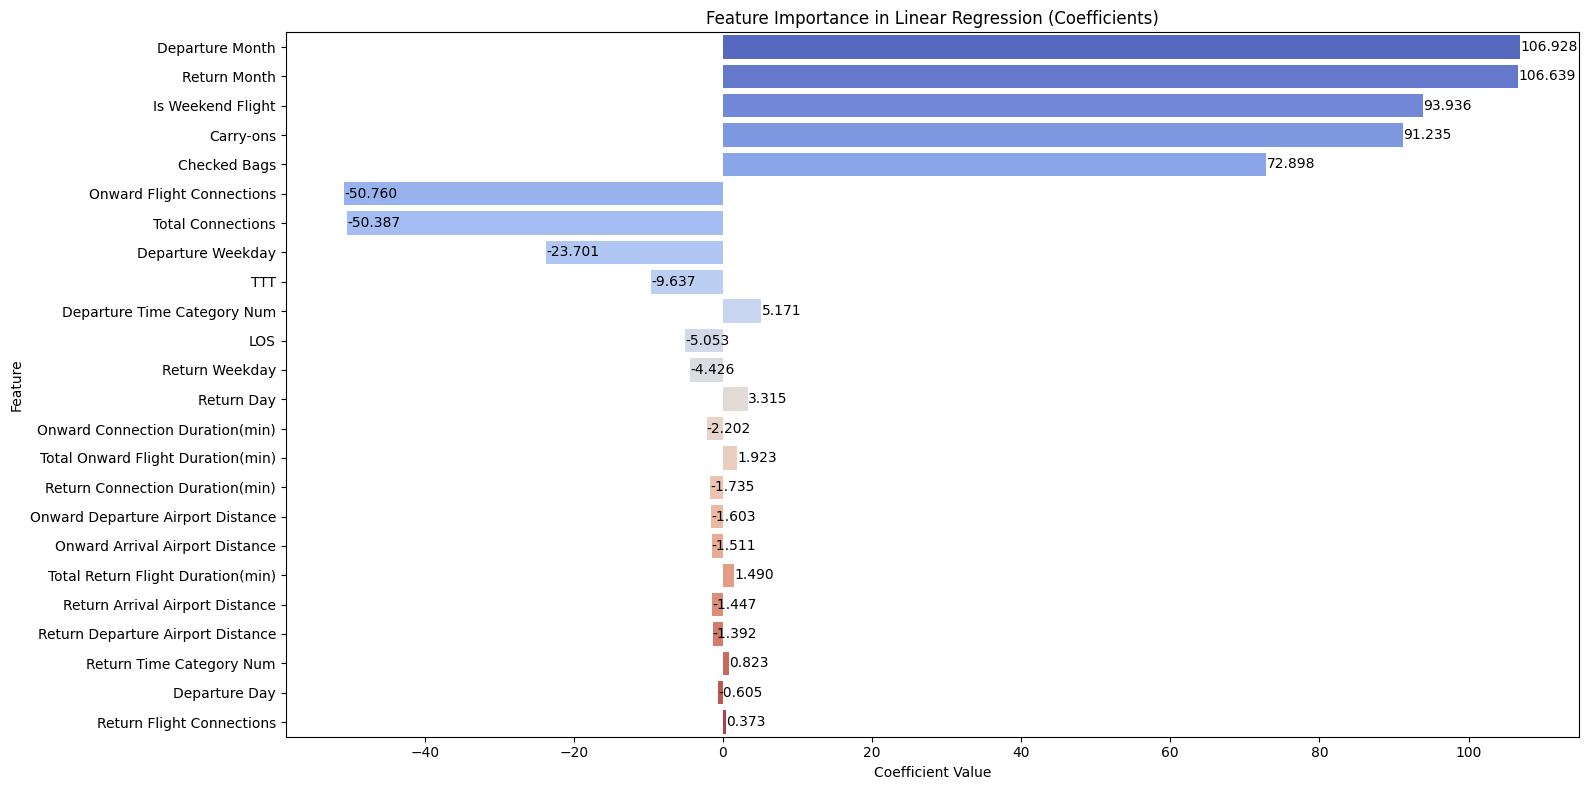

In [79]:
coefficients = model.coef_
features = X_train.columns

importance_df = pd.DataFrame({"Feature": features, "Coefficient": coefficients})
importance_df = round(importance_df, 3)
importance_df["Abs_Coefficient"] = np.abs(importance_df["Coefficient"])
importance_df = importance_df.sort_values(by="Abs_Coefficient", ascending=False)

fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(y=importance_df["Feature"], x=importance_df["Coefficient"], ax=ax, palette="coolwarm")

for index, value in enumerate(importance_df["Coefficient"]):
    ax.text(value, index, f'{value:.3f}', va='center')

ax.set_title("Feature Importance in Linear Regression (Coefficients)")
ax.set_xlabel("Coefficient Value")
ax.set_ylabel("Feature")

plt.tight_layout()
plt.show()

### What we learn:
- `Departure Month`, `Return Month`, `Is Weekend Flight`, `Carry-ons` and `Checked Bags` have the highest **positive** coefficients, indicating they have the strongest impact on the price.
- Features with highly **negative** coefficients such as `Onward Flight Connections` and `Total Connections` decrease the predicted value.
- The results align with business logic. For example, having more flight connections (Total Connections) negatively impacts the outcome, possibly increasing costs or duration.
___

## Conclusion

We tested various predictive approaches and evaluated the effectiveness of **Linear Regression** for flight price prediction.  
The best **R² score** achieved was **~0.40**, indicating that the model explains only 40% of the variance in flight prices.

This result suggests that **flight pricing is not well-captured by a linear model**, which is expected given the complex, nonlinear nature of airfare pricing. Flight prices are influenced by dynamic factors such as supply and demand fluctuations, seasonal trends, airline pricing algorithms, and external market conditions—all of which may require more sophisticated modeling techniques.

While Linear Regression provides a useful baseline, a more advanced approach may be better suited for capturing the nonlinear patterns in the data.

## **Separation by Website**  

To analyze price prediction accuracy for different platforms, we **split the data by website** (`Kayak` and `Momondo`). We then trained a **Linear Regression model separately for each site**, using the best-performing feature set.  

By doing this, we aim to **compare how the model performs on different data sources** and determine whether pricing patterns vary between platforms.  


In [80]:
# To ensure we keep only the relevant columns for training, we will re-split the data and keep only the columns that are part of the model:

# Defining the columns that are part of the model
features = [
    'Total Onward Flight Duration(min)', 'Departure Day', 'Return Day', 'TTT',
    'Total Return Flight Duration(min)', 'Onward Arrival Airport Distance',
    'Onward Departure Airport Distance', 'Return Arrival Airport Distance',
    'Carry-ons', 'Departure Month', 'Return Month', 'Is Weekend Flight', 'Checked Bags'
]

kayak_data = df[df['Site'] == 'Kayak']
momondo_data = df[df['Site'] == 'Momondo']

# Splitting the data
X_kayak = kayak_data[features]
y_kayak = kayak_data['Price(NIS)']

X_momondo = momondo_data[features]
y_momondo = momondo_data['Price(NIS)']

In [81]:
# Splitting into training and test sets
X_train_kayak, X_test_kayak, y_train_kayak, y_test_kayak = train_test_split(X_kayak, y_kayak, test_size=0.3, random_state=101)
X_train_momondo, X_test_momondo, y_train_momondo, y_test_momondo = train_test_split(X_momondo, y_momondo, test_size=0.3, random_state=101)

In [82]:
# Scaling the data (since Linear Regression is sensitive to feature scaling)
scaler = StandardScaler()
X_train_kayak_scaled = scaler.fit_transform(X_train_kayak)
X_test_kayak_scaled = scaler.transform(X_test_kayak)

X_train_momondo_scaled = scaler.fit_transform(X_train_momondo)
X_test_momondo_scaled = scaler.transform(X_test_momondo)

# Initializing and training the Linear Regression model
lin_reg_kayak = LinearRegression()
lin_reg_kayak.fit(X_train_kayak_scaled, y_train_kayak)

lin_reg_momondo = LinearRegression()
lin_reg_momondo.fit(X_train_momondo_scaled, y_train_momondo)

# Making predictions
y_pred_kayak = lin_reg_kayak.predict(X_test_kayak_scaled)
y_pred_momondo = lin_reg_momondo.predict(X_test_momondo_scaled)

In [83]:
# Training the model for Kayak
lin_reg_kayak.fit(X_train_kayak, y_train_kayak)

# Making predictions for Kayak
y_pred_kayak = lin_reg_kayak.predict(X_test_kayak)

# Calculating metrics for Kayak
mse_kayak = mean_squared_error(y_test_kayak, y_pred_kayak)
mae_kayak = mean_absolute_error(y_test_kayak, y_pred_kayak)
rmse_kayak = np.sqrt(mse_kayak)
r2_kayak = r2_score(y_test_kayak, y_pred_kayak)

# Displaying results for Kayak
print("Kayak Results:")
print(f"MSE: {mse_kayak:.2f}")
print(f"MAE: {mae_kayak:.2f}")
print(f"RMSE: {rmse_kayak:.2f}")
print(f"R²: {r2_kayak:.4f}")

Kayak Results:
MSE: 28077.13
MAE: 128.37
RMSE: 167.56
R²: 0.2819


In [84]:
# Training the Linear Regression model for Momondo
lin_reg_momondo.fit(X_train_momondo_scaled, y_train_momondo)

# Making predictions for Momondo
y_pred_momondo = lin_reg_momondo.predict(X_test_momondo_scaled)

# Calculating metrics for Momondo
mse_momondo = mean_squared_error(y_test_momondo, y_pred_momondo)
mae_momondo = mean_absolute_error(y_test_momondo, y_pred_momondo)
rmse_momondo = np.sqrt(mse_momondo)
r2_momondo = r2_score(y_test_momondo, y_pred_momondo)

# Displaying results for Momondo
print("\nMomondo Results:")
print(f"MSE: {mse_momondo:.2f}")
print(f"MAE: {mae_momondo:.2f}")
print(f"RMSE: {rmse_momondo:.2f}")  
print(f"R²: {r2_momondo:.4f}")


Momondo Results:
MSE: 31193.86
MAE: 136.03
RMSE: 176.62
R²: 0.3251


## 📊 Model Evaluation Results

| Metric  | Kayak  | Momondo  |
|---------|--------|---------|
| **MSE**  | 28077.13 | 31193.86 |
| **MAE**  | 128.37  | 136.03  |
| **RMSE** | 167.56  | 176.62  |
| **R²**   | 0.2819  | 0.3251  |

## 🚀 Final Thoughts  

Our **Linear Regression model** provided limited predictive power for flight prices, with **low R² scores** and **high errors** across both Kayak and Momondo. This indicates that flight prices are influenced by **complex, non-linear factors** that a simple linear model cannot fully capture.  

### 🔹 Key Takeaways:  
- **Momondo performed slightly better**, but overall accuracy remained low.  
- **Flight prices likely follow a non-linear pattern**, making Linear Regression insufficient.  
- **Feature selection and engineering might improve results**, but a more advanced approach is needed.  

📌 **Final Conclusion:**  
While Linear Regression served as a **baseline model**, it struggles with the complexity of airfare pricing. Future improvements could involve **non-linear models, deeper feature analysis, or alternative regression techniques** to achieve better accuracy.  
